<a href="https://colab.research.google.com/github/kokkallavaishnavi/machine-learning/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [48]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [49]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [51]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [53]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [54]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [55]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [56]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [58]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 11)                132       
                                                                 
 dense_10 (Dense)            (None, 11)                132       
                                                                 
 dense_11 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.5050 - accuracy: 0.7958 - val_loss: 0.4995 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5028 - accuracy: 0.7958 - val_loss: 0.4995 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7958 - val_loss: 0.4993 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5023 - accuracy: 0.7958 - val_loss: 0.4988 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7958 - val_loss: 0.4984 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7958 - val_loss: 0.4983 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5014 - accuracy: 0.7958 - val_loss: 0.4974 - val_accuracy: 0.7969

In [63]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [64]:
y_pred

array([[0.2403632 ],
       [0.24702875],
       [0.23249432],
       ...,
       [0.22470729],
       [0.25029606],
       [0.2403632 ]], dtype=float32)

In [65]:
y_pred = y_pred.argmax(axis=-1)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

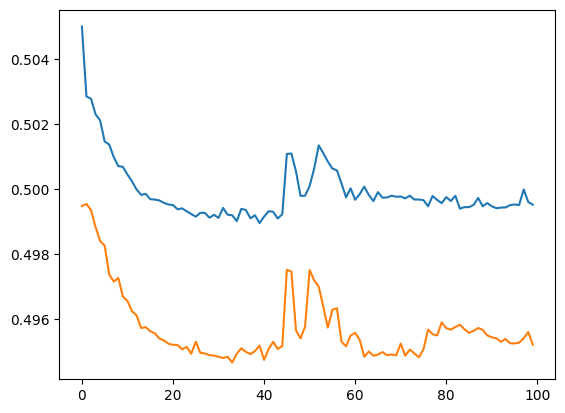

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

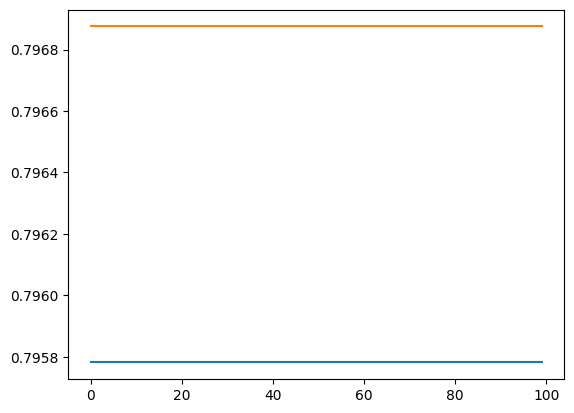

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])